# Steps to Build a Neural Network for Solar Energy Forecasting

# 1. Install Dependencies
Ensure you have TensorFlow installed:


In [ ]:
pip install tensorflow numpy pandas matplotlib scikit-learn


# 2. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 3. Load and Preprocess Solar Energy Data
You'll need historical solar energy production data. Let's assume you have a CSV file with:

Input features: Temperature, Solar Radiation, Cloud Cover, Humidity, Wind Speed
Target variable: Solar Power Output

In [ ]:
# https://www.nrel.gov/grid/solar-power-data.html

# Load dataset
df = pd.read_csv("/content/powerconsumption.csv")

# Inspect the data
print(df.head())

# Define features (X) and target variable (y)
X = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sum(axis=1)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

# 4. Define the Neural Network
A fully connected feedforward neural network works well for time series prediction.

In [ ]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output (predicted solar power)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3489347328.0000 - mae: 51957.8516 - val_loss: 265235936.0000 - val_mae: 14018.3047
Epoch 2/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 259336144.0000 - mae: 13459.5713 - val_loss: 213738160.0000 - val_mae: 12070.3398
Epoch 3/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 230341648.0000 - mae: 12340.2090 - val_loss: 206947824.0000 - val_mae: 11743.4385
Epoch 4/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 223435104.0000 - mae: 12105.0068 - val_loss: 204854640.0000 - val_mae: 11619.6465
Epoch 5/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 220925696.0000 - mae: 11997.6191 - val_loss: 203595872.0000 - val_mae: 11595.6279
Epoch 6/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 221039216.0000 - mae: 11977.8750 - val_loss: 203124800.0000 - val_mae: 11618.2920
Epoch 7/100
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 218893712.0000 - mae: 11945.2939 - val_loss: 201533872.0000 - val_

# 6. Evaluate the Model

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180845680.0000 - mae: 10614.0020
Mean Absolute Error: 10675.71875


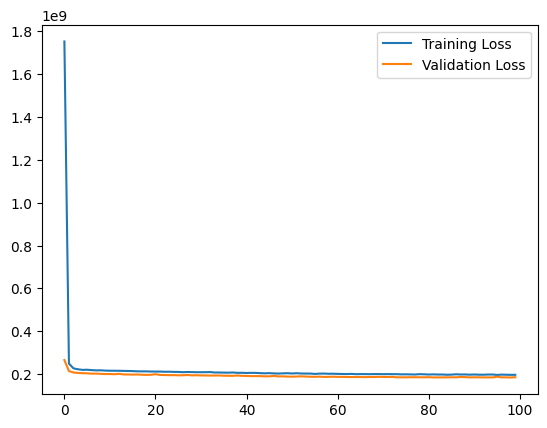

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# 7. Make Predictions

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


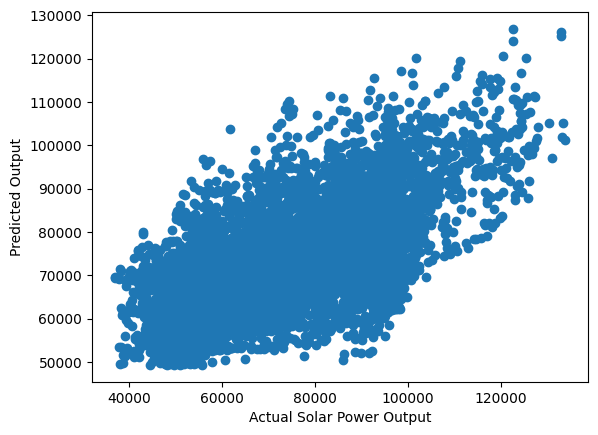

In [ ]:
predictions = model.predict(X_test)

# Compare actual vs predicted
plt.scatter(y_test, predictions)
plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Output")
plt.show()
